# Example IMD Radar Data

In [1]:
import os
import glob
import pyart
import requests
import subprocess
import pyscancf as pcf


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119


## Cite PyScanCf:

## Syed, H. A., Sayyed, I., Kalapureddy, M. C. R., & Grandhi, K. K. (2021).
## PyScanCf – The library for individual sweep datasets of IMD weather radars.
## Zenodo. https://doi.org/10.5281/zenodo.5574160



In [2]:
# GitHub raw content base URL (for downloading)
base_url = "https://raw.githubusercontent.com/syedhamidali/pyscancf_examples/main/data/goa16/"
api_url = "https://api.github.com/repos/syedhamidali/pyscancf_examples/contents/data/goa16"
response = requests.get(api_url)
files = [item["name"] for item in response.json()]
print(files)

['GOA210516024101-IMD-B.nc', 'GOA210516024101-IMD-B.nc.1', 'GOA210516024101-IMD-B.nc.2', 'GOA210516024101-IMD-B.nc.3', 'GOA210516024101-IMD-B.nc.4', 'GOA210516024101-IMD-B.nc.5', 'GOA210516024101-IMD-B.nc.6', 'GOA210516024101-IMD-B.nc.7', 'GOA210516024101-IMD-B.nc.8', 'GOA210516024101-IMD-B.nc.9']


In [3]:
# Target directory to save downloaded files
target_dir = os.path.join(os.getenv("GITHUB_WORKSPACE", "."), "goa_data")
os.makedirs(target_dir, exist_ok=True)

# Function to download files using curl
def download_with_curl(file_name):
    file_url = base_url + file_name
    file_path = os.path.join(target_dir, file_name)

    if not os.path.exists(file_path):
        print(f"Downloading {file_name}...")
        subprocess.run(["curl", "-o", file_path, file_url], check=True)
        print(f"Downloaded {file_name}")
    else:
        print(f"{file_name} already exists.")

    return file_path


# Download the files
downloaded_files = []
for file_name in files:
    file_path = download_with_curl(file_name)
    downloaded_files.append(file_path)

GOA210516024101-IMD-B.nc already exists.
GOA210516024101-IMD-B.nc.1 already exists.
GOA210516024101-IMD-B.nc.2 already exists.
GOA210516024101-IMD-B.nc.3 already exists.
GOA210516024101-IMD-B.nc.4 already exists.
GOA210516024101-IMD-B.nc.5 already exists.
GOA210516024101-IMD-B.nc.6 already exists.
GOA210516024101-IMD-B.nc.7 already exists.
GOA210516024101-IMD-B.nc.8 already exists.
GOA210516024101-IMD-B.nc.9 already exists.


In [4]:
input_dir = target_dir
out_dir = "outdir"
!rm -rf $out_dir

In [5]:
pcf.cfrad(input_dir, out_dir,)

2025-04-18 14:31:02,754 - INFO - Packing 10 sweeps into 1 volumes
2025-04-18 14:31:02,755 - INFO - Processing volume 1
2025-04-18 14:31:04,000 - INFO - Saved cfrad_GOA210516024101-IMD-B.nc
2025-04-18 14:31:04,001 - INFO - Data merging done 
Total Time Elapsed: 0:00:05.284940


In [6]:
files = sorted(glob.glob(out_dir + "/*.nc"))
files

['outdir/cfrad_GOA210516024101-IMD-B.nc']

...............................
Plotting Max-REF 20210516024104
...............................



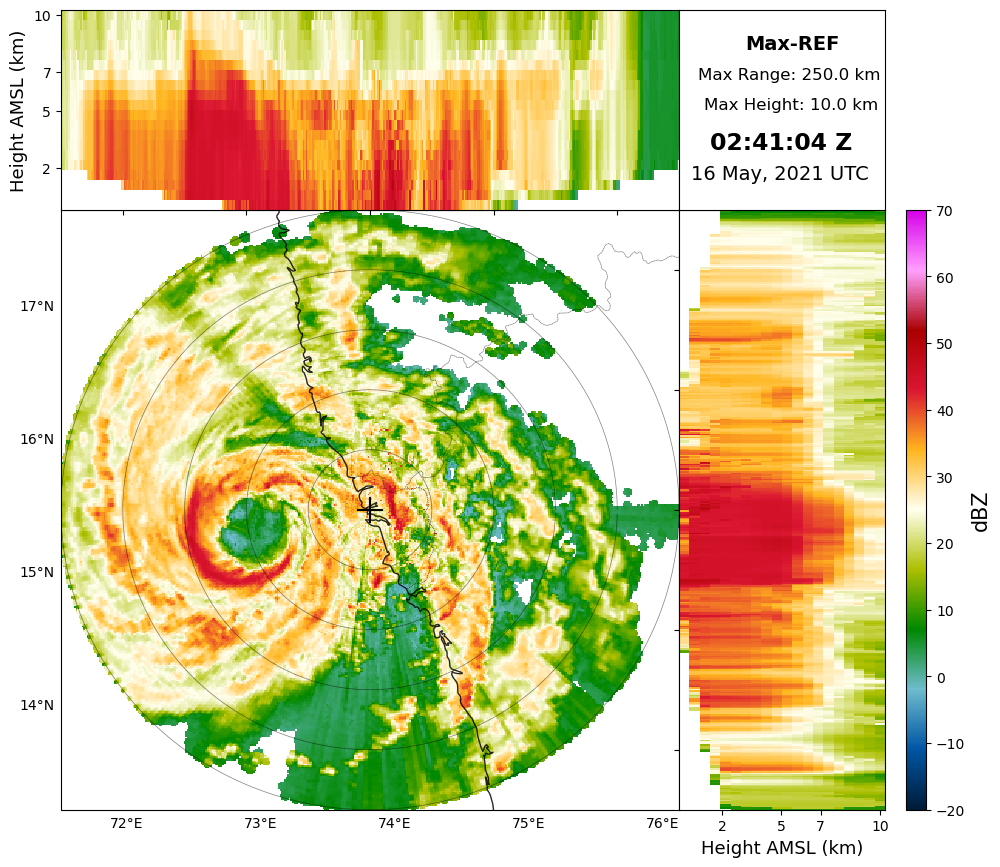

In [7]:
for file in files:
    radar = pyart.io.read(file)
    grid = pcf.get_grid(radar, grid_shape=(20, 401, 401), height=10, length=250)
    grid.fields['REF'] = grid.fields.pop("Z")
    pcf.plot_cappi(grid, "REF")